In [3]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

# Pattern Matching

Extracted from the OpenCV [documentation](https://docs.opencv.org/4.x/d4/dc6/tutorial_py_template_matching.html):

OpenCV comes with a function *matchTemplate* for this purpose. It simply slides the template image over the input image and compares the template and patch of input image under the template image.

### Exercise

Given the following image and the corresponding template, you have to paint a green dot in the center of as many diamonds as you can but minimizing the number of False Positives (false detections).


![image](input/cards.jpg)

**Conditions**: You can't manipulate any image outside the program.

**Deadline**: Friday 7th, 19:00h




In [4]:
# Load images in the BGR space
image = cv2.imread("input/cards.jpg")
template = cv2.imread("input/diamond.png")
# TODO: put your code here

plt.imshow(cv2.cvtColor(image, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.show()

### Extra

I applied gaussian noise to the original image, If you apply the same solution to this new image, do you notice any change?

In [ ]:
def noisy(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    row,col,ch= image.shape
    mean = 0
    var = 1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    noisy = noisy.astype(np.uint8)
    noisy = cv2.cvtColor(noisy, cv2.COLOR_HSV2BGR)

    return noisy
    
image = cv2.imread("input/cards.jpg")
template = cv2.imread("input/diamond.png")
noise = noisy(image)

# TODO: put your code here

plt.imshow(cv2.cvtColor(noise, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.show()




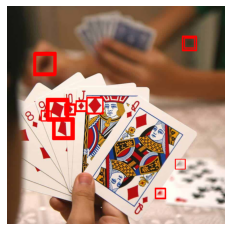

In [110]:
image = cv2.imread("input/cards.jpg")
template = cv2.imread("input/diamond.png")

image_gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
template_gray = cv2.cvtColor(template, cv2.COLOR_BGR2GRAY)

threshold = 0.75
sizes = [1.1, 1.5, 1.75, 2, 2.25]

for size in sizes:
    new_template = cv2.resize(template_gray,(int(template_gray.shape[0]*size), int(template_gray.shape[0]*size)))
    res = cv2.matchTemplate(image_gray, new_template, cv2.TM_CCOEFF_NORMED)
   
    loc = np.where( res >= threshold)
    
    for pt in list(zip(loc[1], loc[0])):
        cv2.rectangle(image, pt, (pt[0] + new_template.shape[0], pt[1] + new_template.shape[1]), (0,0,255), 2)

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()


### Extra

I applied gaussian noise to the original image, do you notice any change? 

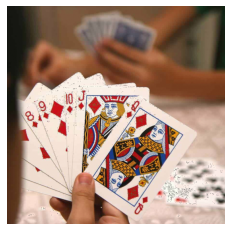

In [111]:
def noisy(image):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2HSV)
    row,col,ch= image.shape
    mean = 0
    var = 1
    sigma = var**0.5
    gauss = np.random.normal(mean,sigma,(row,col,ch))
    gauss = gauss.reshape(row,col,ch)
    noisy = image + gauss
    noisy = noisy.astype(np.uint8)
    noisy = cv2.cvtColor(noisy, cv2.COLOR_HSV2BGR)

    return noisy
    
image = cv2.imread("input/cards.jpg")
noise = noisy(image)

plt.imshow(cv2.cvtColor(noise, cv2.COLOR_RGB2BGR))
plt.axis('off')
plt.show()


